https://rte-opendata.opendatasoft.com/api/records/1.0/search/?dataset=cdc_prod_par_filiere&rows=100&refine.date_heure=2013%2F01%2F05


,date,date_heure,heure,prod_bioenergies,prod_charbon,prod_eolien,prod_fioul,prod_gaz,prod_hydraulique,prod_nucleaire,prod_solaire,prod_thermique_fossile,prod_total,qualite
35,2013-01-05,2013-01-05 00:00:00,01:00,788,427,1025,474,3293,6017,55433,0,4194,67457,Définitive
0,2013-01-05,2013-01-05 00:30:00,01:30,794,193,1021,473,3308,5747,55588,0,3974,67124,Définitive
29,2013-01-05,2013-01-05 01:00:00,02:00,792,-58,1030,474,3301,5746,55278,0,3717,66563,Définitive
36,2013-01-05,2013-01-05 01:30:00,02:30,792,-76,1043,474,3208,5890,54978,0,3606,66309,Définitive
30,2013-01-05,2013-01-05 02:00:00,03:00,790,-75,1018,475,3211,5699,53452,0,3611,64570,Définitive


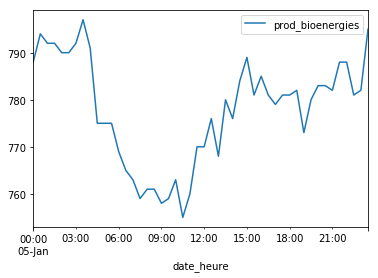

In [50]:
"""
Plot any timeserie taken from the https://rte-opendata.opendatasoft.com plateform.
Choose parameters below after visiting the portal

https://rte-opendata.opendatasoft.com/api/records/1.0/search/?dataset={}&refine.date_heure={}

Step 1 : find the right url on rte-opendata.opendatasoft.com
Step 2 : request it 
Step 3 : save the response it json format
Step 4 : create a dataframe with the data with pd.DataFrame.from_dict
Step 5 : Clean the datetime column
Step 6 : plot
"""


%matplotlib inline
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests


# This is the only thing you should modify
DATASET = "cdc_prod_par_filiere"
DATE= "2013-01-05".replace('-','%2F')
ROWS = 100
Y = 'prod_bioenergies'
#

url = "https://rte-opendata.opendatasoft.com/api/records/1.0/search/?dataset={}&rows={}&refine.date_heure={}".format(DATASET,ROWS,DATE)  
print(url)
data = requests.get(url).json()

records = []

for d in data["records"]:
    records.append(d["fields"])
    
df = pd.DataFrame.from_dict(records)

df['date_heure'] = pd.to_datetime(df['date_heure'])

df.sort_values(by='date_heure',inplace=True)
df.plot(x='date_heure',y=Y)

df.head()


